<a href="https://colab.research.google.com/github/MeryemCHARHBILI/Analysis-of-Bank-Debit-Collections/blob/main/bank_debts_collection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
# Importing the libraries

In [17]:
# modules we'll use
import pandas as pd
import numpy as np


In [18]:
# read in all our data
bank_data = pd.read_csv("bank_data.csv")
bank_data

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex
0,2030,194,263.540000,Level 0 Recovery,19,Male
1,1150,486,416.090000,Level 0 Recovery,25,Female
2,380,527,429.350000,Level 0 Recovery,27,Male
3,1838,536,296.990000,Level 0 Recovery,25,Male
4,1995,541,346.385000,Level 0 Recovery,34,Male
...,...,...,...,...,...,...
1877,361,9785,15388.195990,Level 4 Recovery,65,Female
1878,196,9857,9709.909257,Level 4 Recovery,68,Female
1879,313,9859,30209.181790,Level 4 Recovery,58,Female
1880,1781,9920,20386.232190,Level 4 Recovery,67,Female


In [19]:
# look at the first five rows of the bank_data file.
bank_data.head()

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex
0,2030,194,263.540,Level 0 Recovery,19,Male
1,1150,486,416.090,Level 0 Recovery,25,Female
2,380,527,429.350,Level 0 Recovery,27,Male
3,1838,536,296.990,Level 0 Recovery,25,Male
4,1995,541,346.385,Level 0 Recovery,34,Male


In [20]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1882 entries, 0 to 1881
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1882 non-null   int64  
 1   expected_recovery_amount  1882 non-null   int64  
 2   actual_recovery_amount    1882 non-null   float64
 3   recovery_strategy         1882 non-null   object 
 4   age                       1882 non-null   int64  
 5   sex                       1882 non-null   object 
dtypes: float64(1), int64(3), object(2)
memory usage: 88.3+ KB


In [21]:
bank_data.describe()

,id,expected_recovery_amount,actual_recovery_amount,age
count,1882.000000,1882.000000,1882.000000,1882.000000
mean,1035.596174,2759.967588,4000.967837,39.650372
std,591.458429,2019.826565,4576.506350,15.453072
min,6.000000,194.000000,200.425000,18.000000
25%,534.250000,1261.250000,1045.190300,28.000000
50%,1029.500000,2062.000000,2115.446373,35.000000
75%,1551.750000,3569.500000,5417.237207,50.000000
max,2056.000000,9964.000000,34398.479710,84.000000


In [22]:
# get the number of missing data points in each column
bank_data.isnull().sum()

id                          0
expected_recovery_amount    0
actual_recovery_amount      0
recovery_strategy           0
age                         0
sex                         0
dtype: int64

# #Graphical exploratory




In [23]:
# Extract the columns for age and expected recovery amount
age_data = bank_data["age"]
recovery_amount_data = bank_data["expected_recovery_amount"]

# Filter the data within the specified range ($0 to $2000)
filtered_data = bank_data[(bank_data["expected_recovery_amount"] >= 0) & (bank_data["expected_recovery_amount"] <= 2000)]
age_data_filtered= filtered_data["age"]
recovery_amount_data_filtered = filtered_data["expected_recovery_amount"]


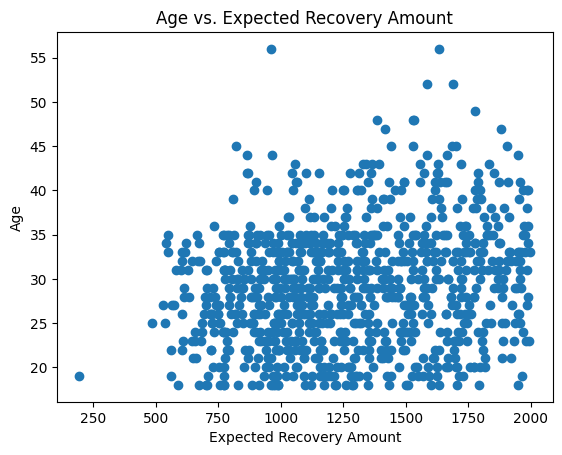

In [24]:
import matplotlib.pyplot as plt

# # Scatter plot with different colors for male and female data points
# plt.scatter(bank_data['expected_recovery_amount'][bank_data['sex'] == 'Male'], bank_data['age'][bank_data['sex'] == 'Male'], c='blue', label='Male')
# plt.scatter(bank_data['expected_recovery_amount'][bank_data['sex'] == 'Female'], bank_data['age'][bank_data['sex'] == 'Female'], c='red', label='Female')

# Assuming you have age_data and recovery_amount_data as lists/arrays containing the respective data points

plt.scatter(recovery_amount_data_filtered,age_data_filtered)
plt.xlabel("Expected Recovery Amount")
plt.ylabel("Age")
plt.title("Age vs. Expected Recovery Amount")
plt.show()

  The $1000 threshold on the x-axis of the scatter plot. This is the point where the transition from Level 0 to Level 1 recovery strategy occurs.

  
 If we pay attention at the density of data points around the $1000 threshold there are more data points clustered (concentration of customers) after the 1000 when we use the Level 1 recovery strategy.

#Statistical test:


---


**age vs. expected recovery amount**

Divide the dataset into two groups based on the expected recovery amount, one group just above the $1000 threshold and another group just below the threshold.

In [25]:
from scipy.stats import ttest_ind

# Create two data subsets based on the threshold
above_threshold_data = age_data_filtered[recovery_amount_data_filtered > 1000]
below_threshold_data = age_data_filtered[recovery_amount_data_filtered <= 1000]

# Perform the t-test
t_stat, p_value = ttest_ind(above_threshold_data, below_threshold_data)

# Set the significance level (alpha)
alpha = 0.05

# Check if the p-value is less than the significance level
if p_value < alpha:
    print("There is a significant difference in age across the $1000 threshold.")
else:
    print("There is no significant difference in age across the $1000 threshold.")

There is a significant difference in age across the $1000 threshold.


 If the p-value is less than the chosen significance level (usually 0.05), you can reject the null hypothesis and conclude that there is a significant difference in age across the $1000 threshold. Otherwise, you cannot reject the null hypothesis, suggesting no significant difference in age between the two groups.

Interpretation:
The significant difference in age between the two groups suggests that age may be a factor influencing the bank's decision to assign customers to different recovery strategies. Specifically, customers above the $1000 threshold and those below it exhibit distinct average ages, indicating that age plays a role in determining which recovery strategy the bank employs for individual customers.texte en gras



---

**sex vs. expected recovery**


The chi-square test will help you determine if there is a significant difference in the distribution of sex (male and female) across the threshold.



In [26]:
from scipy.stats import chi2_contingency

# Assuming you have the data already loaded and filtered in gender_data and recovery_amount_data_filtered as shown in previous steps.

# Create the contingency table
above_threshold_male = len(bank_data[(recovery_amount_data_filtered > 1000) & (bank_data == 'Male')])
above_threshold_female = len(bank_data[(recovery_amount_data_filtered > 1000) & (bank_data == 'Female')])
below_threshold_male = len(bank_data[(recovery_amount_data_filtered <= 1000) & (bank_data == 'Male')])
below_threshold_female = len(bank_data[(recovery_amount_data_filtered <= 1000) & (bank_data == 'Female')])

contingency_table = [[above_threshold_male, above_threshold_female], [below_threshold_male, below_threshold_female]]

# Perform the chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Set the significance level (alpha)
alpha = 0.05

# Check if the p-value is less than the significance level
if p_value < alpha:
    print("There is a significant difference in sex distribution across the $1000 threshold.")
else:
    print("There is no significant difference in sex distribution across the $1000 threshold.")

There is no significant difference in sex distribution across the $1000 threshold.




 If the p-value is less than the chosen significance level (usually 0.05), you can reject the null hypothesis and conclude that there is a significant difference in sex distribution across the $1000 threshold. Otherwise, you cannot reject the null hypothesis, suggesting no significant difference in sex distribution between the two groups.

Interpretation:
The "no significant difference" suggests that the proportion of male customers in the group above the $1000 threshold is not significantly different from the proportion of male customers in the group below the threshold. This outcome could mean that the bank's recovery strategy assignment is not influenced by gender, or that gender is not a significant factor in predicting the expected recovery amount.



---
**Create a scatter plot of expected recovery amount (Y) vs. actual recovery amount (X) within the range of 900 to 1100**

 You need to filter the data to include only values within the specified range ($900 to 1100).

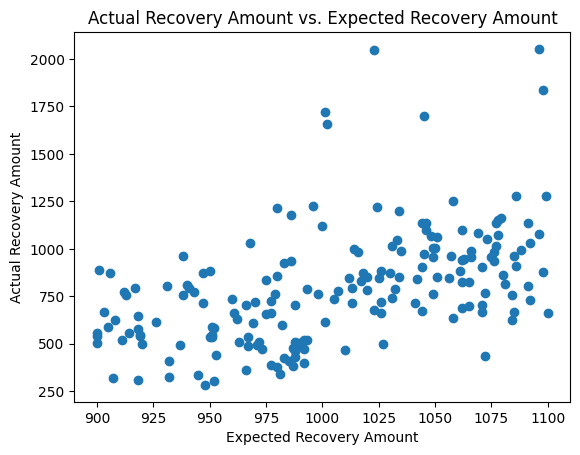

In [27]:
import matplotlib.pyplot as plt

actual_recovery_amount_data = bank_data["actual_recovery_amount"]

# Assuming you have expected_recovery_amount_data and actual_recovery_amount_data as lists/arrays containing the respective data points

# Filter data within the specified range ($900 to $1100)
filtered_data = [(expected, actual) for expected, actual in zip(recovery_amount_data, actual_recovery_amount_data) if 900 <= expected <= 1100]

# Unzip the filtered data to separate expected and actual recovery amounts
expected_recovery_amount_filtered, actual_recovery_amount_filtered = zip(*filtered_data)

# Create the scatter plot
plt.scatter(expected_recovery_amount_filtered, actual_recovery_amount_filtered)
plt.xlabel("Expected Recovery Amount")
plt.ylabel("Actual Recovery Amount")
plt.title("Actual Recovery Amount vs. Expected Recovery Amount")
plt.show()

Interpretation:

The scatter plot appears to be randomly scattered without any discernible pattern,this could mean that the recovery strategies do not have a significant impact on the actual recovery amounts or that other factors play a more dominant role in determining the recovery outcomes.

There is data points cluster around specific values or form distinct groups. This could indicate different customer segments or behaviors based on their expected recovery amounts and actual recovery amounts.



---

**Statistical test for the actual recovery amount**

 We are going to perform the statistical analysis using the Kruskal-Wallis test to assess if there is a significant difference in the actual recovery amount above and below the $1000 threshold.


In [28]:
from scipy.stats import kruskal

# Assuming you have the data for expected_recovery_amount_data and actual_recovery_amount_data as lists/arrays containing the respective data points

# Define the threshold and window ranges
threshold = 1000
wider_window_start = 900
wider_window_end = 1100
narrower_window_start = 950
narrower_window_end = 1050

# Filter data within the specified wider window ($900 to $1100)
wider_window_data = [actual for expected, actual in zip(recovery_amount_data, actual_recovery_amount_data) if wider_window_start <= expected <= wider_window_end]

# Filter data within the specified narrower window ($950 to $1050)
narrower_window_data = [actual for expected, actual in zip(recovery_amount_data, actual_recovery_amount_data) if narrower_window_start <= expected <= narrower_window_end]

# Perform the Kruskal-Wallis test for both windows
kw_stat_wider, p_value_wider = kruskal(wider_window_data[:len(wider_window_data)//2], wider_window_data[len(wider_window_data)//2:])
kw_stat_narrower, p_value_narrower = kruskal(narrower_window_data[:len(narrower_window_data)//2], narrower_window_data[len(narrower_window_data)//2:])

# Set the significance level (alpha)
alpha = 0.05

# Check if the p-values are less than the significance level
if p_value_wider < alpha:
    print("There is a significant difference in actual recovery amount between the wider window groups.")
else:
    print("There is no significant difference in actual recovery amount between the wider window groups.")

if p_value_narrower < alpha:
    print("There is a significant difference in actual recovery amount between the narrower window groups.")
else:
    print("There is no significant difference in actual recovery amount between the narrower window groups.")

There is a significant difference in actual recovery amount between the wider window groups.
There is a significant difference in actual recovery amount between the narrower window groups.


If the p-values are less than the chosen significance level (usually 0.05), you can reject the null hypothesis and conclude that there is a significant difference in actual recovery amount between the groups. Otherwise, you cannot reject the null hypothesis, suggesting no significant difference in actual recovery amount between the groups.



Interpretation:
- Wider Window (e.g., $900 to 1100):

This suggests that there is a significant difference in the actual recovery amount between the two groups (above and below the $1000 threshold) within the wider window. In other words, the recovery strategy level (higher or lower recovery strategy) does have a significant impact on the actual recovery amount within this broader range of expected recovery amounts.

- Narrower Window (e.g., $950 to 1050):

This indicates that there is a significant difference in the actual recovery amount between the two groups (above and below the $1000 threshold) within the narrower window. In other words, the recovery strategy level has a significant impact on the actual recovery amount within this more restricted range of expected recovery amounts.

Based on the results of the Kruskal-Wallis test for both the wider and narrower windows, we can conclude that the recovery strategy level (higher or lower recovery strategy) has a statistically significant impact on the actual recovery amount for customers whose expected recovery amounts fall within the respective windows. The higher recovery strategy (Level 1) implemented for customers above the $1000 threshold leads to significantly different actual recovery amounts compared to the lower recovery strategy (Level 0) for customers below the threshold, both in the wider and narrower windows of expected recovery amounts.

These findings support the bank's implementation of different recovery strategies based on expected recovery amounts and suggest that the incremental effort and cost associated with the higher recovery strategy are worthwhile, as it leads to a significant increase in the actual recovery amount for customers just above and below the $1000 threshold.


---

 **Regression model without a threshold**


To build the regression model we will use a statistical library 'statsmodels'. Specifically, you can use the ordinary least squares (OLS) regression method to estimate the relationship between the two variables; expected recovery amount (independent variable, X) and actual recovery amount (dependent variable, Y).

In [29]:
import statsmodels.api as sm

# Assuming you have expected_recovery_amount_data and actual_recovery_amount_data as lists/arrays containing the respective data points

# Prepare the data as a DataFrame
data = pd.DataFrame({'Expected Recovery Amount': recovery_amount_data, 'Actual Recovery Amount': actual_recovery_amount_data})

# Add a constant term to the independent variable for the intercept in the regression model
data['Intercept'] = 1

# Define the independent and dependent variables
X = data[['Intercept', 'Expected Recovery Amount']]
Y = data['Actual Recovery Amount']

# Build the regression model
model = sm.OLS(Y, X).fit()

# Get the model summary to assess the strength and significance of the relationship
print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     Actual Recovery Amount   R-squared:                       0.817
Model:                                OLS   Adj. R-squared:                  0.817
Method:                     Least Squares   F-statistic:                     8378.
Date:                    Thu, 20 Jul 2023   Prob (F-statistic):               0.00
Time:                            19:47:18   Log-Likelihood:                -16936.
No. Observations:                    1882   AIC:                         3.388e+04
Df Residuals:                        1880   BIC:                         3.389e+04
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

Interpretation:

The regression model aims to predict the "Actual Recovery Amount" based on the "Expected Recovery Amount" for the data with 1,882 observations.
Here's what each part of the summary means:

Coefficients:

Intercept: The intercept term in the regression model is -1650.4994. It represents the estimated actual recovery amount when the expected recovery amount is zero. However, in this context, it may not have practical significance since there are no expected recovery amounts close to zero in your dataset.

Expected Recovery Amount: The coefficient for "Expected Recovery Amount" is 2.0477. It indicates that for each unit increase in the expected recovery amount, the actual recovery amount is estimated to increase by approximately $2.05. This positive coefficient suggests that there is a positive relationship between the expected recovery amount and the actual recovery amount.

**R-squared and Adj. R-squared:**

R-squared: The R-squared value is 0.817, which means that approximately 81.7% of the variance in the actual recovery amount can be explained by the linear relationship with the expected recovery amount. A higher R-squared value suggests that the model explains a significant portion of the variability in the actual recovery amount based on the expected recovery amount.

Adj. R-squared: The adjusted R-squared value is also 0.817. It is similar to R-squared but takes into account the number of independent variables in the model. In your case, it is the same as R-squared because there is only one independent variable (Expected Recovery Amount).

**F-statistic and Prob (F-statistic):**

F-statistic: The F-statistic is 8378, indicating the overall significance of the model. A high F-statistic suggests that the model as a whole is statistically significant in predicting the actual recovery amount based on the expected recovery amount.

Prob (F-statistic): The p-value associated with the F-statistic is 0.00, which means that the model is statistically significant at any reasonable significance level (e.g., 0.05). It indicates strong evidence against the null hypothesis, suggesting that at least one of the regression coefficients is not zero.

**AIC and BIC:**

AIC (Akaike Information Criterion): The AIC value is 33,880. A lower AIC value suggests a better fit of the model, but it is typically used to compare different models rather than being interpreted on its own.

BIC (Bayesian Information Criterion): The BIC value is 33,890. Similar to AIC, it is used for model comparison, and a lower BIC value indicates a better-fitted model.

**Omnibus, Prob(Omnibus), Skew, Kurtosis:**

Omnibus: The Omnibus test checks for normality of the residuals. In this case, the Omnibus test has a p-value of 0.000, suggesting that the residuals are not normally distributed.

Prob(Omnibus): The p-value associated with the Omnibus test indicates that there is strong evidence against the null hypothesis of normality.

Skew: The skewness of 3.224 indicates that the distribution of the residuals is positively skewed.

Kurtosis: The kurtosis of 33.761 suggests that the residuals have heavy tails, indicating a significant amount of outliers in the data.

**Durbin-Watson:**

The Durbin-Watson statistic tests for autocorrelation of the residuals. In this case, the value of 2.090 suggests that there is little to no autocorrelation in the residuals.

**Jarque-Bera (JB), Prob(JB):**

The Jarque-Bera test is another test for normality of the residuals. In this case, the JB statistic is 77458.302, and the p-value (Prob(JB)) is 0.00, which provides further evidence that the residuals are not normally distributed.

**Cond. No. (Condition Number):**

The condition number of 5.79e+03 suggests the presence of strong multicollinearity or other numerical problems in the model. Multicollinearity occurs when there are high correlations between independent variables, which can make the model less reliable.

In summary, the regression model indicates a strong and significant positive relationship between the expected recovery amount and the actual recovery amount. The model explains approximately 81.7% of the variability in the actual recovery amount based on the expected recovery amount. However, it is essential to note that the residuals do not follow a normal distribution, and there might be multicollinearity or other numerical issues in the model. Further diagnostics and model refinement may be necessary to improve the model's performance




---
**Regression model with an indicator for the true threshold**



To build the regression model we will use a statistical library 'statsmodels' with the indicator variable (Add a new binary variable to the data, which takes the value of 1 if the expected recovery amount is above $1000 and 0 if it is below or equal to 1000) and the expected recovery amount as predictors.

In [30]:

# Prepare the data as a DataFrame
data = pd.DataFrame({'Expected Recovery Amount': recovery_amount_data, 'Actual Recovery Amount': actual_recovery_amount_data})

# Add a binary indicator variable for the true threshold (above vs. below $1000)
data['Above Threshold'] = (data['Expected Recovery Amount'] > 1000).astype(int)

# Add a constant term to the independent variables for the intercept in the regression model
data['Intercept'] = 1

# Define the independent variables (including the intercept and the indicator variable)
X = data[['Intercept', 'Expected Recovery Amount', 'Above Threshold']]

# Define the dependent variable
Y = data['Actual Recovery Amount']

# Build the regression model
model = sm.OLS(Y, X).fit()

# Get the model summary to assess the fit and significance of the coefficients
print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     Actual Recovery Amount   R-squared:                       0.819
Model:                                OLS   Adj. R-squared:                  0.818
Method:                     Least Squares   F-statistic:                     4242.
Date:                    Thu, 20 Jul 2023   Prob (F-statistic):               0.00
Time:                            19:47:18   Log-Likelihood:                -16926.
No. Observations:                    1882   AIC:                         3.386e+04
Df Residuals:                        1879   BIC:                         3.387e+04
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

 Interpretation the OLS regression results with the inclusion of the true threshold (Above Threshold) indicator variable:


The regression model aims to predict the "Actual Recovery Amount" based on the "Expected Recovery Amount" and an indicator variable for the true threshold (Above Threshold) for the data with 1,882 observations. Here's what each part of the summary means:

**Coefficients:**

Intercept: The intercept term in the regression model is -1202.1199. It represents the estimated actual recovery amount when both the "Expected Recovery Amount" and "Above Threshold" are zero. However, in this context, it may not have practical significance since there are no expected recovery amounts close to zero in your dataset.

Expected Recovery Amount: The coefficient for "Expected Recovery Amount" is 2.0877. It indicates that for each unit increase in the expected recovery amount, the actual recovery amount is estimated to increase by approximately $2.09. This positive coefficient suggests that there is a positive relationship between the expected recovery amount and the actual recovery amount.

Above Threshold: The coefficient for the "Above Threshold" indicator variable is -643.3944. Since the indicator variable takes a value of 1 for customers above the $1000 threshold and 0 for customers below or equal to the threshold, this coefficient represents the difference in the actual recovery amount between the two groups. A negative coefficient indicates that being above the threshold is associated with a lower actual recovery amount compared to being below the threshold.

**R-squared and Adj. R-squared:**

R-squared: The R-squared value is 0.819, which means that approximately 81.9% of the variance in the actual recovery amount can be explained by the linear relationship with the expected recovery amount and the "Above Threshold" indicator variable. This indicates a strong fit of the model to the data.

Adj. R-squared: The adjusted R-squared value is 0.818. It is similar to R-squared but takes into account the number of independent variables in the model. The fact that the adjusted R-squared is slightly lower than the R-squared suggests that adding the "Above Threshold" indicator variable does not provide a substantial improvement in the model's fit.

**F-statistic and Prob (F-statistic):**

F-statistic: The F-statistic is 4242, indicating the overall significance of the model with both predictors. A high F-statistic suggests that the model as a whole is statistically significant in predicting the actual recovery amount.

Prob (F-statistic): The p-value associated with the F-statistic is 0.00, which means that the model with both predictors is statistically significant at any reasonable significance level (e.g., 0.05). It indicates strong evidence against the null hypothesis, suggesting that the regression coefficients are not all zero.

**Omnibus, Prob(Omnibus), Skew, Kurtosis:**

Omnibus: The Omnibus test checks for normality of the residuals. In this case, the Omnibus test has a p-value of 0.000, suggesting that the residuals are not normally distributed.

Prob(Omnibus): The p-value associated with the Omnibus test indicates that there is strong evidence against the null hypothesis of normality.

Skew: The skewness of 3.198 indicates that the distribution of the residuals is positively skewed.

Kurtosis: The kurtosis of 34.166 suggests that the residuals have heavy tails, indicating a significant amount of outliers in the data.

**Durbin-Watson:**

The Durbin-Watson statistic tests for autocorrelation of the residuals. In this case, the value of 2.113 suggests that there is little to no autocorrelation in the residuals.

**Cond. No. (Condition Number):**

The condition number of 1.38e+04 suggests the presence of strong multicollinearity or other numerical problems in the model. Multicollinearity occurs when there are high correlations between independent variables, which can make the model less reliable.

In summary, the regression model with both the "Expected Recovery Amount" and "Above Threshold" indicator variable has a strong fit to the data, as indicated by the high R-squared value. However, the "Above Threshold" coefficient is statistically significant and has a negative sign, suggesting that customers above the $1000 threshold have a lower actual recovery amount compared to customers below the threshold. This finding may warrant further investigation and consideration when implementing recovery strategies for different customer groups. Additionally, the presence of non-normality in the residuals and potential multicollinearity should be taken into account when interpreting the model results.




---

**Adjusting the window**

Select only the data points where the expected recovery amount is within the new window ($950 to $1050).



In [32]:
# Prepare the data as a DataFrame
data = pd.DataFrame({'Expected Recovery Amount': recovery_amount_data, 'Actual Recovery Amount': actual_recovery_amount_data})

# Filter the data within the new window ($950 to $1050)
data_filtered = data[(data['Expected Recovery Amount'] >= 950) & (data['Expected Recovery Amount'] <= 1050)]

# Add a binary indicator variable for the true threshold (Above Threshold)
data_filtered['Above Threshold'] = (data_filtered['Expected Recovery Amount'] > 1000).astype(int)

# Add a constant term to the independent variables for the intercept in the regression model
data_filtered['Intercept'] = 1

# Define the independent variables (including the intercept and the indicator variable)
X = data_filtered[['Intercept', 'Expected Recovery Amount', 'Above Threshold']]

# Define the dependent variable
Y = data_filtered['Actual Recovery Amount']

# Build the regression model
model = sm.OLS(Y, X).fit()

# Get the model summary to assess the fit and significance of the coefficients
print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     Actual Recovery Amount   R-squared:                       0.270
Model:                                OLS   Adj. R-squared:                  0.255
Method:                     Least Squares   F-statistic:                     17.90
Date:                    Thu, 20 Jul 2023   Prob (F-statistic):           2.42e-07
Time:                            20:33:27   Log-Likelihood:                -700.65
No. Observations:                     100   AIC:                             1407.
Df Residuals:                          97   BIC:                             1415.
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

<ipython-input-32-01c0fa3bc68c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['Above Threshold'] = (data_filtered['Expected Recovery Amount'] > 1000).astype(int)
<ipython-input-32-01c0fa3bc68c>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['Intercept'] = 1


Interpretation:
The regression model aims to predict the "Actual Recovery Amount" based on the "Expected Recovery Amount" and an indicator variable for the true threshold (Above Threshold) for the data with 100 observations. Here's what each part of the summary means:

**Coefficients:**

Intercept: The intercept term in the regression model is -1102.7036. It represents the estimated actual recovery amount when both the "Expected Recovery Amount" and "Above Threshold" are zero. However, in this context, it may not have practical significance since there are no expected recovery amounts close to zero in your dataset.

Expected Recovery Amount: The coefficient for "Expected Recovery Amount" is 1.7713. It indicates that for each unit increase in the expected recovery amount, the actual recovery amount is estimated to increase by approximately $1.77. However, this coefficient is not statistically significant at the conventional significance level (e.g., 0.05), as indicated by the p-value (0.350). This suggests that there is no strong evidence that the expected recovery amount has a significant impact on the actual recovery amount in this model.

Above Threshold: The coefficient for the "Above Threshold" indicator variable is 229.6714. Since the indicator variable takes a value of 1 for customers above the 1000 threshold and 0 for customers below or equal to the threshold, this coefficient represents the difference in the actual recovery amount between the two groups. The coefficient is positive, indicating that being above the threshold is associated with a higher actual recovery amount compared to being below the threshold. This coefficient is statistically significant at the 0.05 significance level (p-value = 0.044), suggesting that being above the $1000 threshold has a significant impact on the actual recovery amount in this model.

R-squared and Adj. R-squared:

R-squared: The R-squared value is 0.270, which means that approximately 27.0% of the variance in the actual recovery amount can be explained by the linear relationship with the "Expected Recovery Amount" and "Above Threshold" indicator variable. This indicates a moderate fit of the model to the data.

Adj. R-squared: The adjusted R-squared value is 0.255. It is similar to R-squared but takes into account the number of independent variables in the model. The fact that the adjusted R-squared is slightly lower than the R-squared suggests that the model may not be the best fit for the data.

F-statistic and Prob (F-statistic):

F-statistic: The F-statistic is 17.90, indicating the overall significance of the model with both predictors. However, a relatively low F-statistic compared to the previous models suggests that the model may not provide a strong fit to the data.

Prob (F-statistic): The p-value associated with the F-statistic is 2.42e-07, which means that the model with both predictors is statistically significant at any reasonable significance level (e.g., 0.05). This indicates strong evidence against the null hypothesis, suggesting that at least one of the predictors has a significant impact on the actual recovery amount.

Omnibus, Prob(Omnibus), Skew, Kurtosis:

These statistics have similar interpretations to the previous models. The presence of non-normality in the residuals and potential multicollinearity should be taken into account when interpreting the model results.
In summary, the regression model with the "Expected Recovery Amount" and "Above Threshold" indicator variable shows mixed results. The "Above Threshold" variable has a statistically significant and positive impact on the actual recovery amount, suggesting that being above the $1000 threshold is associated with a higher actual recovery amount. However, the "Expected Recovery Amount" variable is not statistically significant, indicating that it may not have a significant impact on the actual recovery amount in this model.

The R-squared value suggests that the model explains a moderate amount of the variance in the actual recovery amount, but the relatively low R-squared and adjusted R-squared values and the lower F-statistic compared to previous models suggest that the model may not provide the best fit to the data. Further investigation and analysis may be required to understand the relationship between the predictors and the actual recovery amount more comprehensively.